# Resolución de un problema mediante búsqueda heurística

### RafaCastle

# Solución 1

# Resumen

Este código utuliza la estrategia de búsqueda heurística A* con el fin de generar un plan que permita a un robot de Amazon mover el inventario de un estado inicial a un estado objetivo. Tanto el estado inicial como el estado objetivo pueden cambiarse dentro del mismo y el código arrojará la mejor solución, de existir alguna. El código genera un GIF llamado *RUTA_ROBOT.gif* donde se muestra la solución de manera gráfica, éste es guardado en la misma carpeta donde se ubique este notebook, también es mostrado al final del notebook.

In [12]:
import heapq
import numpy as np
import matplotlib.pyplot as plt
import imageio
from IPython.display import Image

## Definiendo funciones

Se definen 2 funciones, una implementa la busqueda A* y usa a la segunda función, que encuentra a las ditancias Manhattan, como función heurística. En la siguiente celda se muestra el funcionamiento detallado de cada una de las líneas.

In [13]:
# Define la distancia de Manhattan entre dos puntos
def distancia_manhattan(punto1, punto2):
    return abs(punto1[0] - punto2[0]) + abs(punto1[1] - punto2[1])

# Función que implementa la búsqueda A*
def a_star(cuadricula, inicio, objetivo, visualizar, etiqueta='r',accion=''):
    # Crea una estructura de datos para almacenar el camino más corto hasta el momento
    heap = [(0, inicio)]
    anterior = {}
    costo_actual = {}
    anterior[inicio] = None
    costo_actual[inicio] = 0
    imagenes_gif = []

    # Mientras aún quedan puntos por explorar en el heap
    while heap:
        # Obtiene el punto con la menor distancia de Manhattan hasta el objetivo
        actual = heapq.heappop(heap)[1]

        # Si se ha llegado al objetivo, devuelve el camino más corto
        if actual == objetivo:
            camino = []
            instrucciones = []
            
            # Recrear el camino de atrás para adelante, posteriormente se volteará
            while actual != inicio:
                camino.append(actual)
                instrucciones.append(f'Ir hacia {actual}')
                actual = anterior[actual]
            camino.append(inicio)
            
            # Volteando
            camino.reverse()
            instrucciones.reverse()
            instrucciones.append(accion)
            
            # Para ver la ruta gráficamente en dataframes
            if visualizar:
                for paso in camino:
                    
                    # Para generar el GIF
                    cuadricula[paso[0]][paso[1]] = 120 #if accion == 'CARGA' else 250
                    
                    # Solo para mostrar los obstáculos en la imagen
                    for objeto_colocado in objetos_colocados:
                        cuadricula[objeto_colocado[0]][objeto_colocado[1]] = 250
                        
                    # Nueva cuadrícula más grande, para generar una buena imagen
                    nueva_cuadricula = []
                    for renglon in cuadricula:
                        for j in range(80):
                            nuevo_renglon = []
                            nueva_cuadricula.append(nuevo_renglon)
                            for punto in renglon:
                                for i in range(80):
                                    if type(punto)==str:
                                        punto=120
                                    nuevo_renglon.append(punto)
                    imagenes_gif.append(nueva_cuadricula)
                    
                    # Se resetean los obstáculos
                    for objeto_colocado in objetos_colocados:
                        cuadricula[objeto_colocado[0]][objeto_colocado[1]] = 0
                    
                    # Reseteando la ubicación
                    cuadricula[paso[0]][paso[1]] = 0
            return camino, objetivo, len(camino), instrucciones, imagenes_gif 

        # Obtiene los vecinos del punto actual
        vecinos = [(actual[0] + x, actual[1] + y) for x, y in [(0, 1), (0, -1), (1, 0), (-1, 0)]]

        # Filtra los vecinos que están fuera de la cuadrícula o que son obstáculos
        vecinos = [(x, y) for x, y in vecinos if 0 <= x < len(cuadricula) and 0 <= y < len(cuadricula[0]) and cuadricula[x][y] != 250]

        # Para cada vecino, calcula la nueva distancia de Manhattan hasta el objetivo
        for vecino in vecinos:
            nuevo_costo = costo_actual[actual] + distancia_manhattan(vecino, objetivo)
            
             # Agrega el vecino al heap si es mejor que la distancia previa, cuidando no regresar por donde venías
            if vecino not in costo_actual or nuevo_costo < costo_actual[vecino]:
                costo_actual[vecino] = nuevo_costo
                
                # Obtenemos las proridades para la función heapq.heappush
                prioridad = nuevo_costo + distancia_manhattan(vecino, objetivo)
                heapq.heappush(heap, (prioridad, vecino))
                anterior[vecino] = actual

    # Si no se ha encontrado un camino hasta el objetivo, devuelve None
    return None

## Corriendo el código

In [14]:
# Creando cuadrícula con obstáculos
#los valores 250 representan los obstáculos
cuadricula = [[0, 250, 0, 0],
              [0, 250, 0, 0],
              [0, 0, 0, 0],
              [0, 0, 0, 0]]

# copia para resetear la cuadrícula más adelante
cuadricula_copia = cuadricula[:]

# Definir la posición de inicio y destino
posicion = (2, 2)

# haciendo una copia
primera_posicion=tuple(posicion)

objetos = {'M1':(0,0),'M2':(2,0),'M3':(0,3)}
objetos_destino = {'M1':(3,3),'M2':(3,2),'M3':(3,1)}

# listas y diccionarios vacíos que se llenarán al finalizar
objetos_colocados=[]
objetos_final={}
instrucciones_completas=[]
imagenes_secuencia = []

while len(objetos)>0:
    rutas={}
    for objeto in objetos:
        posicion_objetivo = objetos[objeto]

        # Realizar la búsqueda A*
        ruta, _, costo_real, _, _ = a_star(cuadricula, posicion, posicion_objetivo, False)
        rutas[objeto]=costo_real
        
        # Agregar las cajas
        cuadricula[objetos[objeto][0]][objetos[objeto][1]] = objeto

    # Vamos por la carga!
    
    # Escogiendo el objeto más cercano
    objeto_cercano = min(rutas, key=rutas.get)
    posicion_objetivo = objetos[objeto_cercano]
    
    # Buscando la mejor ruta
    ruta, posicion, costo_real, instrucciones, imagenes = a_star(cuadricula, posicion, posicion_objetivo, True, 'R', 'CARGA')
    imagenes_secuencia+=imagenes
    instrucciones_completas+=instrucciones
    
    # Regresamos con la carga!
    
    # Agregar los objetos ya colocados
    for objeto_colocado in objetos_colocados:
        cuadricula[objeto_colocado[0]][objeto_colocado[1]] = 250
        
    # Buscando la mejor ruta
    posicion_objetivo = objetos_destino[objeto_cercano]
    ruta, posicion, costo_real, instrucciones, imagenes = a_star(cuadricula, posicion, posicion_objetivo, True, objeto_cercano, 'DESCARGA')
    imagenes_secuencia+=imagenes
    instrucciones_completas+=instrucciones
    
    # Registrar el objeto colocado
    objetos_colocados.append(posicion)
    objetos.pop(objeto_cercano)
    
    objetos_final[objeto_cercano]=posicion
    
    # Reseteando la cuadrícula
    cuadricula = cuadricula_copia

print('Instrucciones\n')    

print(f'Estas en {primera_posicion} \n')
for i,instruccion in enumerate(instrucciones_completas):
    print(f'{i+1}:', instruccion)
    
print(f'\nTotal de acciones = {len(instrucciones_completas)}')

Instrucciones

Estas en (2, 2) 

1: Ir hacia (2, 1)
2: Ir hacia (2, 0)
3: CARGA
4: Ir hacia (2, 1)
5: Ir hacia (2, 2)
6: Ir hacia (3, 2)
7: DESCARGA
8: Ir hacia (2, 2)
9: Ir hacia (1, 2)
10: Ir hacia (0, 2)
11: Ir hacia (0, 3)
12: CARGA
13: Ir hacia (0, 2)
14: Ir hacia (1, 2)
15: Ir hacia (2, 2)
16: Ir hacia (2, 1)
17: Ir hacia (3, 1)
18: DESCARGA
19: Ir hacia (2, 1)
20: Ir hacia (2, 0)
21: Ir hacia (1, 0)
22: Ir hacia (0, 0)
23: CARGA
24: Ir hacia (1, 0)
25: Ir hacia (2, 0)
26: Ir hacia (2, 1)
27: Ir hacia (2, 2)
28: Ir hacia (2, 3)
29: Ir hacia (3, 3)
30: DESCARGA

Total de acciones = 30


## Creando GIF


El GIF no se visualiza en el visor de github pero se encuentra en este repositorio, puede visualizarse al entrar directamente al archivo.

GIF creado con la solución: 


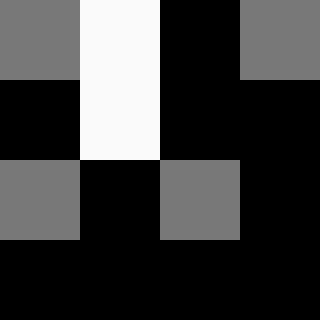

In [15]:
imageio.mimsave('RUTA_ROBOT.gif', np.array(imagenes_secuencia).astype(np.uint8), fps=8)
print('GIF creado con la solución: ')
display(Image(filename='RUTA_ROBOT.gif'))